In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.compat.v1 as tf
from sklearn import preprocessing

In [2]:
data = pd.read_csv("/content/train_data_mal_fake_detect - Sheet1.csv")
test_data = pd.read_csv("/content/Untitled spreadsheet - Sheet1.csv")
data

ID                                               News  Label
0     FAKE_1001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...  FALSE
1     FAKE_1002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...  FALSE
2     FAKE_1003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...  FALSE
3     FAKE_1004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...  FALSE
4     FAKE_1005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...  FALSE
...         ...                                                ...    ...
1664  FAKE_2665  ഷിർദിയിലെ സായി ക്ഷേത്രത്തിൽ ഹിന്ദുക്കൾ നൽകുന്ന...  FALSE
1665  FAKE_2666  ഉത്തര്പ്രദേശിലെ മദ്രസയില് യുവാവ് കുട്ടിയെ ക്രൂ...  FALSE
1666  FAKE_2667  ഐഎസ്ആർഒ ചന്ദ്രയാൻ -3 മിഷൻ ശനിയിൽ ഇറങ്ങുന്നതിന്...  FALSE
1667  FAKE_2668  ഹിലാരി ചുഴലിക്കാറ്റിനെ തുടര്ന്ന് വിമാനം തകര്ന്...  FALSE
1668  FAKE_2669  2024 ലെ പൊതുതെരഞ്ഞെടുപ്പില് ജനങ്ങള് ബിജെപിക്ക്...  FALSE

[1669 rows x 3 columns]

In [15]:
import pandas as pd
from sklearn import preprocessing

# Load your data
data = pd.read_csv("/content/train_data_mal_fake_detect - Sheet1.csv")

# Define the label mapping
label_mapping = {'FALSE     ': 0, 'HALF TRUE': 1, 'MOSTLY FALSE': 2, 'PARTLY FALSE': 3, 'MOSTLY TRUE': 4}

# Apply the label mapping to the 'label' column
data['label'] = data['Label'].map(label_mapping)

# Check the first few rows of the updated DataFrame
print(data.head())


          ID                                               News  Label  label
0  FAKE_1001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...  FALSE    NaN
1  FAKE_1002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...  FALSE    NaN
2  FAKE_1003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...  FALSE    NaN
3  FAKE_1004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...  FALSE    NaN
4  FAKE_1005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...  FALSE    NaN


In [16]:
data['label'].unique()

array([nan,  1.,  2.,  3.,  4.])

In [17]:
data['label'].isna().sum()

1246

In [18]:
data['label'].fillna(data['label'].mode()[0], inplace=True)
data

ID                                               News  Label  \
0     FAKE_1001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...  FALSE   
1     FAKE_1002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...  FALSE   
2     FAKE_1003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...  FALSE   
3     FAKE_1004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...  FALSE   
4     FAKE_1005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...  FALSE   
...         ...                                                ...    ...   
1664  FAKE_2665  ഷിർദിയിലെ സായി ക്ഷേത്രത്തിൽ ഹിന്ദുക്കൾ നൽകുന്ന...  FALSE   
1665  FAKE_2666  ഉത്തര്പ്രദേശിലെ മദ്രസയില് യുവാവ് കുട്ടിയെ ക്രൂ...  FALSE   
1666  FAKE_2667  ഐഎസ്ആർഒ ചന്ദ്രയാൻ -3 മിഷൻ ശനിയിൽ ഇറങ്ങുന്നതിന്...  FALSE   
1667  FAKE_2668  ഹിലാരി ചുഴലിക്കാറ്റിനെ തുടര്ന്ന് വിമാനം തകര്ന്...  FALSE   
1668  FAKE_2669  2024 ലെ പൊതുതെരഞ്ഞെടുപ്പില് ജനങ്ങള് ബിജെപിക്ക്...  FALSE   

      label  
0       2.0  
1       2.0  
2       2.0  
3       2.0  
4       2.0  
...     ...  
1664    2.0  
1665    2.0  
1666    2.0  
1667    2.0  
1668    2.0  

[1669 rows x 4 columns]

In [19]:
data['label'].fillna(data['label'].mode()[0], inplace=True)
data

ID                                               News  Label  \
0     FAKE_1001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...  FALSE   
1     FAKE_1002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...  FALSE   
2     FAKE_1003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...  FALSE   
3     FAKE_1004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...  FALSE   
4     FAKE_1005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...  FALSE   
...         ...                                                ...    ...   
1664  FAKE_2665  ഷിർദിയിലെ സായി ക്ഷേത്രത്തിൽ ഹിന്ദുക്കൾ നൽകുന്ന...  FALSE   
1665  FAKE_2666  ഉത്തര്പ്രദേശിലെ മദ്രസയില് യുവാവ് കുട്ടിയെ ക്രൂ...  FALSE   
1666  FAKE_2667  ഐഎസ്ആർഒ ചന്ദ്രയാൻ -3 മിഷൻ ശനിയിൽ ഇറങ്ങുന്നതിന്...  FALSE   
1667  FAKE_2668  ഹിലാരി ചുഴലിക്കാറ്റിനെ തുടര്ന്ന് വിമാനം തകര്ന്...  FALSE   
1668  FAKE_2669  2024 ലെ പൊതുതെരഞ്ഞെടുപ്പില് ജനങ്ങള് ബിജെപിക്ക്...  FALSE   

      label  
0       2.0  
1       2.0  
2       2.0  
3       2.0  
4       2.0  
...     ...  
1664    2.0  
1665    2.0  
1666    2.0  
1667    2.0  
1668    2.0  

[1669 rows x 4 columns]

In [20]:
data.label.value_counts()

2.0    1485
1.0     141
3.0      42
4.0       1
Name: label, dtype: int64

In [9]:
data['label'].fillna(data['label'].mode()[0], inplace=True)
data['label'].unique()

array([2., 1., 3., 4.])

In [21]:
# Replace the 'News' column with 'text'
text_column = 'text'
if 'News' in data.columns:
    data[text_column] = data['News']
    data.drop(columns=['News'], inplace=True)

    # Tokenize and preprocess your text data using the 'text' column
    text_data = data[text_column]
    # Add your text processing code here

    # For example, printing the first few rows of text data
    print(text_data.head())
else:
    print("The 'News' column is not present in the DataFrame.")

0    കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...
1    ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...
2    പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...
3    വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...
4    കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...
Name: text, dtype: object


In [22]:

# Set the number of classes
num_classes = 5

# Fill missing values in the 'text' column with an empty string
data['text'].fillna('', inplace=True)

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
word_index = tokenizer.word_index
vocab_size = len(word_index)

In [23]:
  max_length = 54
  padding_type = 'post'
  trunc_type = 'post'


In [24]:
sequences = tokenizer.texts_to_sequences(data['text'])
padded = pad_sequences(sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)

In [27]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded, data['label'], test_size=0.2, random_state=42)

In [25]:
# Define the Bi-LSTM model
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size + 1, output_dim=50, input_length=max_length, trainable=False),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

In [41]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 54, 50)            459950    
                                                                 
 bidirectional (Bidirection  (None, 128)               58880     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 527411 (2.01 MB)
Trainable params: 67461 (263.52 KB)
Non-trainable params: 459950 (1.75 MB)
_________________________________________________________________


In [42]:
 # Train the model
num_epochs = 50
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/50
42/42 - 12s - loss: 0.7940 - accuracy: 0.8674 - val_loss: 0.4265 - val_accuracy: 0.9012 - 12s/epoch - 295ms/step
Epoch 2/50
42/42 - 5s - loss: 0.4268 - accuracy: 0.8869 - val_loss: 0.3894 - val_accuracy: 0.9012 - 5s/epoch - 123ms/step
Epoch 3/50
42/42 - 5s - loss: 0.4209 - accuracy: 0.8869 - val_loss: 0.3932 - val_accuracy: 0.9012 - 5s/epoch - 113ms/step
Epoch 4/50
42/42 - 7s - loss: 0.4198 - accuracy: 0.8869 - val_loss: 0.3973 - val_accuracy: 0.9012 - 7s/epoch - 158ms/step
Epoch 5/50
42/42 - 5s - loss: 0.4214 - accuracy: 0.8869 - val_loss: 0.3926 - val_accuracy: 0.9012 - 5s/epoch - 108ms/step
Epoch 6/50
42/42 - 5s - loss: 0.4189 - accuracy: 0.8869 - val_loss: 0.3879 - val_accuracy: 0.9012 - 5s/epoch - 124ms/step
Epoch 7/50
42/42 - 6s - loss: 0.4177 - accuracy: 0.8869 - val_loss: 0.3875 - val_accuracy: 0.9012 - 6s/epoch - 146ms/step
Epoch 8/50
42/42 - 5s - loss: 0.4161 - accuracy: 0.8869 - val_loss: 0.3871 - val_accuracy: 0.9012 - 5s/epoch - 111ms/step
Epoch 9/50
42/42 - 7s 

In [43]:
# Confusion Matrix
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

11/11 [==============================] - 1s 20ms/step
Confusion Matrix:
[[  0  22   1]
 [  9 286   6]
 [  0  10   0]]


In [44]:
# Classification Report
class_report = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        23
         2.0       0.90      0.95      0.92       301
         3.0       0.00      0.00      0.00        10

    accuracy                           0.86       334
   macro avg       0.30      0.32      0.31       334
weighted avg       0.81      0.86      0.83       334



Skipping class 0 due to a single unique value.
Skipping class 4 due to a single unique value.


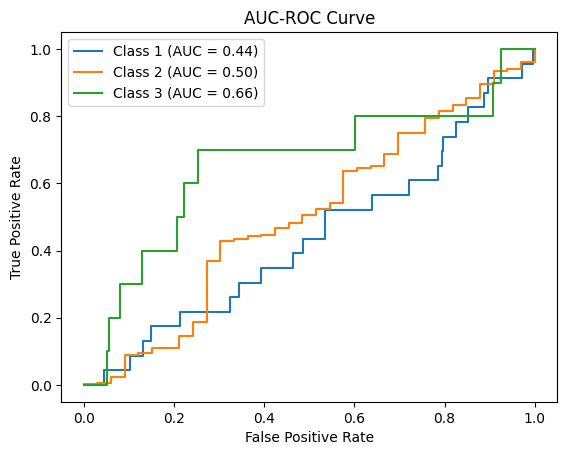

Overall AUC-ROC Score: 0.5327198073773479


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Plot the training and validation loss
import matplotlib.pyplot as plt# Calculate AUC-ROC Score
auc_scores = []
for class_index in range(num_classes):
    class_samples = (y_test == class_index)
    if len(np.unique(class_samples)) == 1:
        print(f"Skipping class {class_index} due to a single unique value.")
        continue

    fpr, tpr, _ = roc_curve(class_samples, predictions[:, class_index])
    auc = roc_auc_score(class_samples, predictions[:, class_index])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"Class {class_index} (AUC = {auc:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Overall AUC-ROC Score
if auc_scores:
    overall_auc = np.mean(auc_scores)
    print(f"Overall AUC-ROC Score: {overall_auc}")
else:
    print("No classes had sufficient samples for ROC analysis.")

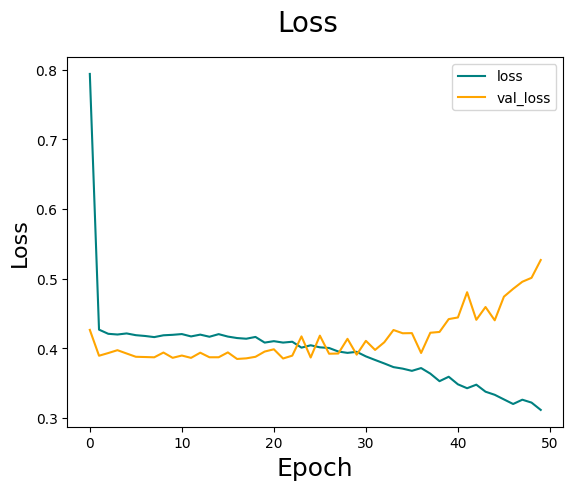

In [46]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=16)
plt.legend()
plt.show()

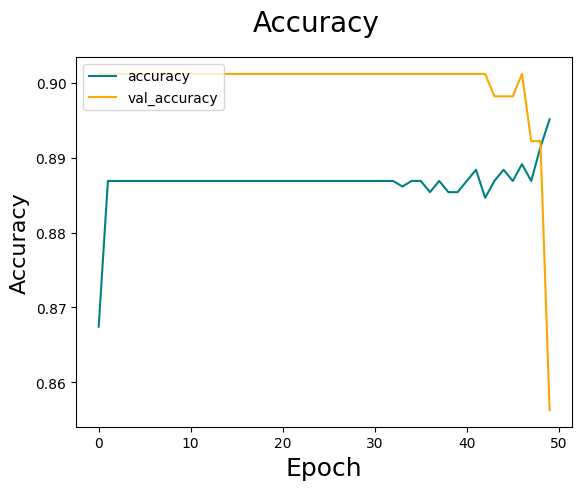

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc="upper left")
plt.show()

In [48]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Assuming 'labels' is the column containing the target labels in your training data
# You might need to replace 'labels' with the appropriate column name from your training data
labels = data['label']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit label encoder and transform labels
encoded_labels = le.fit_transform(labels)


# Load your test data
test_data = pd.read_csv("/content/Untitled spreadsheet - Sheet1.csv")

# Assuming 'News' is the column containing text data
text_column = 'News'

# Fill missing values in the 'News' column with an empty string
test_data[text_column].fillna('', inplace=True)

# Tokenize and pad sequences
sequences = tokenizer.texts_to_sequences(test_data[text_column])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Perform any additional steps (e.g., model prediction) using 'padded_sequences'


# Make predictions on test data
classifications = []

for text in test_data['News']:
    # Tokenize and pad the sequence
    sequences = tokenizer.texts_to_sequences([text])
    sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Perform prediction
    prediction = model.predict(sequences, verbose=0)[0]

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Map the predicted class back to the original labels
    predicted_label = le.inverse_transform([predicted_class])[0]

    # Append the classification to the list
    classifications.append((text, predicted_label))

# Print the results
for text, predicted_label in classifications:
    print(text)
    print(predicted_label)

# Convert the results to a DataFrame and save to CSV
df = pd.DataFrame(classifications, columns=['text', 'predicted_label'])
df.to_csv('bi_lstm_output_5_classes.csv', index=False)


ചന്ദനക്കുറിയണിഞ്ഞ് വിഎസ് അച്യുതാനന്ദൻ.
3.0
നെറ്റിയില്‍ ചന്ദനക്കുറിയിട്ട് വിഎസ് അച്യുതാനന്ദന്‍റെ ചിത്രം
3.0
മുഖ്യമന്ത്രി പിണറായി വിജയനെതിരെ വിഎസ് അച്യുതാനന്ദൻ തരംതാണ പരാമർശം നടത്തി
3.0
വിശ്വസിച്ച് കൂടെ നിന്ന സഖാവ് അലനേയും സഖാവ് താഹയെയും ആ പാർട്ടി ചതിച്ചു പിന്നെയാണോ ഒരു സമൂഹത്തെ ചതിക്കാൻ പിണറായിക്ക് ബുദ്ധിമുട്ട്… പിണറായിയുടെ ഈ കാപട്യം ജനം തിരിച്ചറിയും – സഖാവ് വിഎസ്
3.0
പിണറായി വിജയനെപ്പറ്റി വിഎസ് അച്യുതാനന്ദൻ തരംതാണ പരാമർശം നടത്തിയോ…?
3.0
വി എസ് അച്യുതാനന്ദൻ സുരേഷ് ഗോപിക്ക് പിന്തുണ പ്രഖ്യാപിച്ചോ….?
3.0
കീർത്തി സുരേഷ് ഫർഹാൻ എന്ന മുസ്ലിം യുവാവിനെ കല്യാണം കഴിയ്ക്കുന്നു
3.0
യെമനില്‍ പുരുഷന്‍മാര്‍ക്ക് രണ്ട് വിവാഹം നിര്‍ബന്ധമാക്കിക്കൊണ്ടുള്ള ഉത്തരവ് പുറത്തിറക്കി.
3.0
ബിഹാറിൽ എട്ടു വയസുകാരിയുടെ വിവാഹം നടന്നു
3.0
ബഹ്‌റൈനിലെ ഇസ്രയേല്‍ എംബസിക്ക് പലസ്തീന്‍ അനുകൂലികള്‍ തീയിട്ടു.
3.0
സ്നേഹത്തില്‍ പൊതിഞ്ഞ പാവക്കുട്ടികള്‍, ഈ സമ്മാനമെല്ലാം പലസ്‌തീനിലെ കുട്ടികള്‍ക്കോ?
3.0
ഗാസയിലെ കുട്ടികളെ ചേര്‍ത്തുനിര്‍ത്തി ക്രിസ്റ്റ്യാനോ റൊണാള്‍ഡോ, പലസ്‌തീന് പിന്തുണ'; വീഡിയോ സത്യമോ?
3.0
സഹതാപത്തിനായി പലസ്തീനിലെ ജനങ്ങ